In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from skimage import io
import pandas as pd
import json

In [3]:
import anndata
import scanpy as sc
import squidpy as sq

In [4]:
data_root = r"E:\LungIMCData\HumanSampling35\LungROIProcessing\Steinbock"

In [5]:
test_roi_name = "H17-0458-5-ROI016"

### Load Indivisual ROI 

In [6]:
roi_h5ad_path = os.path.join(data_root, "rois_h5ad", "{}.h5ad".format(test_roi_name))
roi_adata = sc.read_h5ad(roi_h5ad_path)

### Load cell phenotype information

In [7]:
cell_phenotype_dict = None
cell_phenotype_path = os.path.join(data_root, "cell_phenotypes.json")
with open(cell_phenotype_path) as fp:
    cell_phenotype_dict = json.load(fp)
cell_ids = [ele for ele in cell_phenotype_dict.keys()]
roi_phenotypes_dict = {}
# collect roi list
roi_lst = []
for cell_id in cell_ids:
    roi_name = cell_id[:cell_id.rfind("_")]
    if roi_name not in roi_lst:
        roi_lst.append(roi_name)
# collect roi cell numbers
roi_cell_dict = {}
for cell_id in cell_ids:
    roi_name = cell_id[:cell_id.rfind("_")]
    if roi_name not in roi_cell_dict:
        roi_cell_dict[roi_name] = 1
    else:   
        roi_cell_dict[roi_name] += 1
# collect cell_phenotypes
for roi_name in roi_lst:
    cell_num = roi_cell_dict[roi_name]
    cell_phenotypes = [cell_phenotype_dict[roi_name + "_" + str(num)] for num in range(1, cell_num + 1)]
    roi_phenotypes_dict[roi_name] = pd.Categorical(cell_phenotypes) 

In [8]:
roi_adata.obs["cell_type"] = roi_phenotypes_dict[test_roi_name]

In [9]:
spatial_coords = np.transpose(np.asarray([roi_adata.obs["centroid-1"].tolist(), roi_adata.obs["centroid-0"].tolist()]))
roi_adata.obsm["spatial"] = spatial_coords

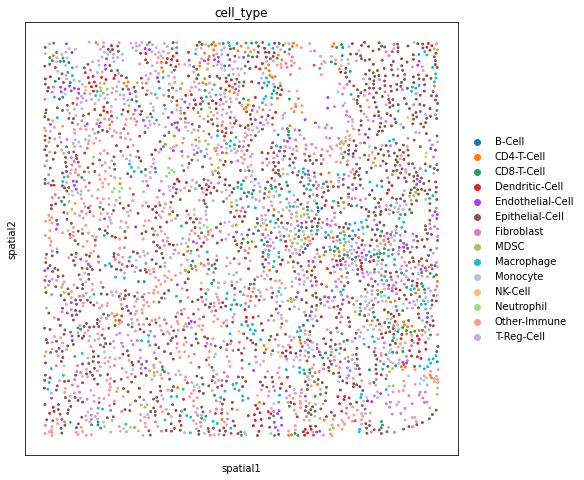

In [10]:
sq.pl.spatial_scatter(roi_adata, shape=None, color="cell_type", figsize=(8, 8), size=10)

In [23]:
sq.gr.spatial_neighbors(roi_adata, spatial_key="spatial", coord_type="generic", radius=20.0)

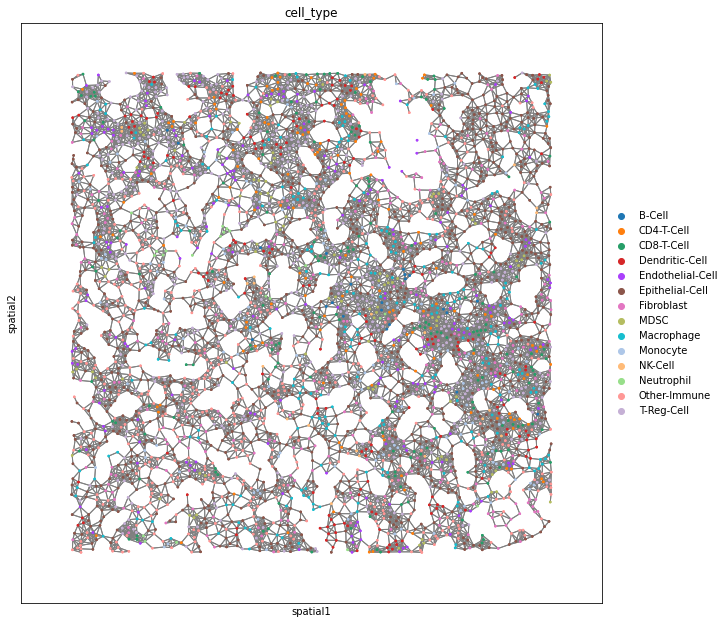

In [24]:
sq.pl.spatial_scatter(roi_adata, shape=None, color="cell_type", connectivity_key="spatial_connectivities", figsize=(10, 10), size=10)

In [14]:
# z_scores, enrichment_counts = sq.gr.nhood_enrichment(roi_adata, cluster_key="cell_type", copy = True)
sq.gr.nhood_enrichment(roi_adata, cluster_key="cell_type", show_progress_bar=False)

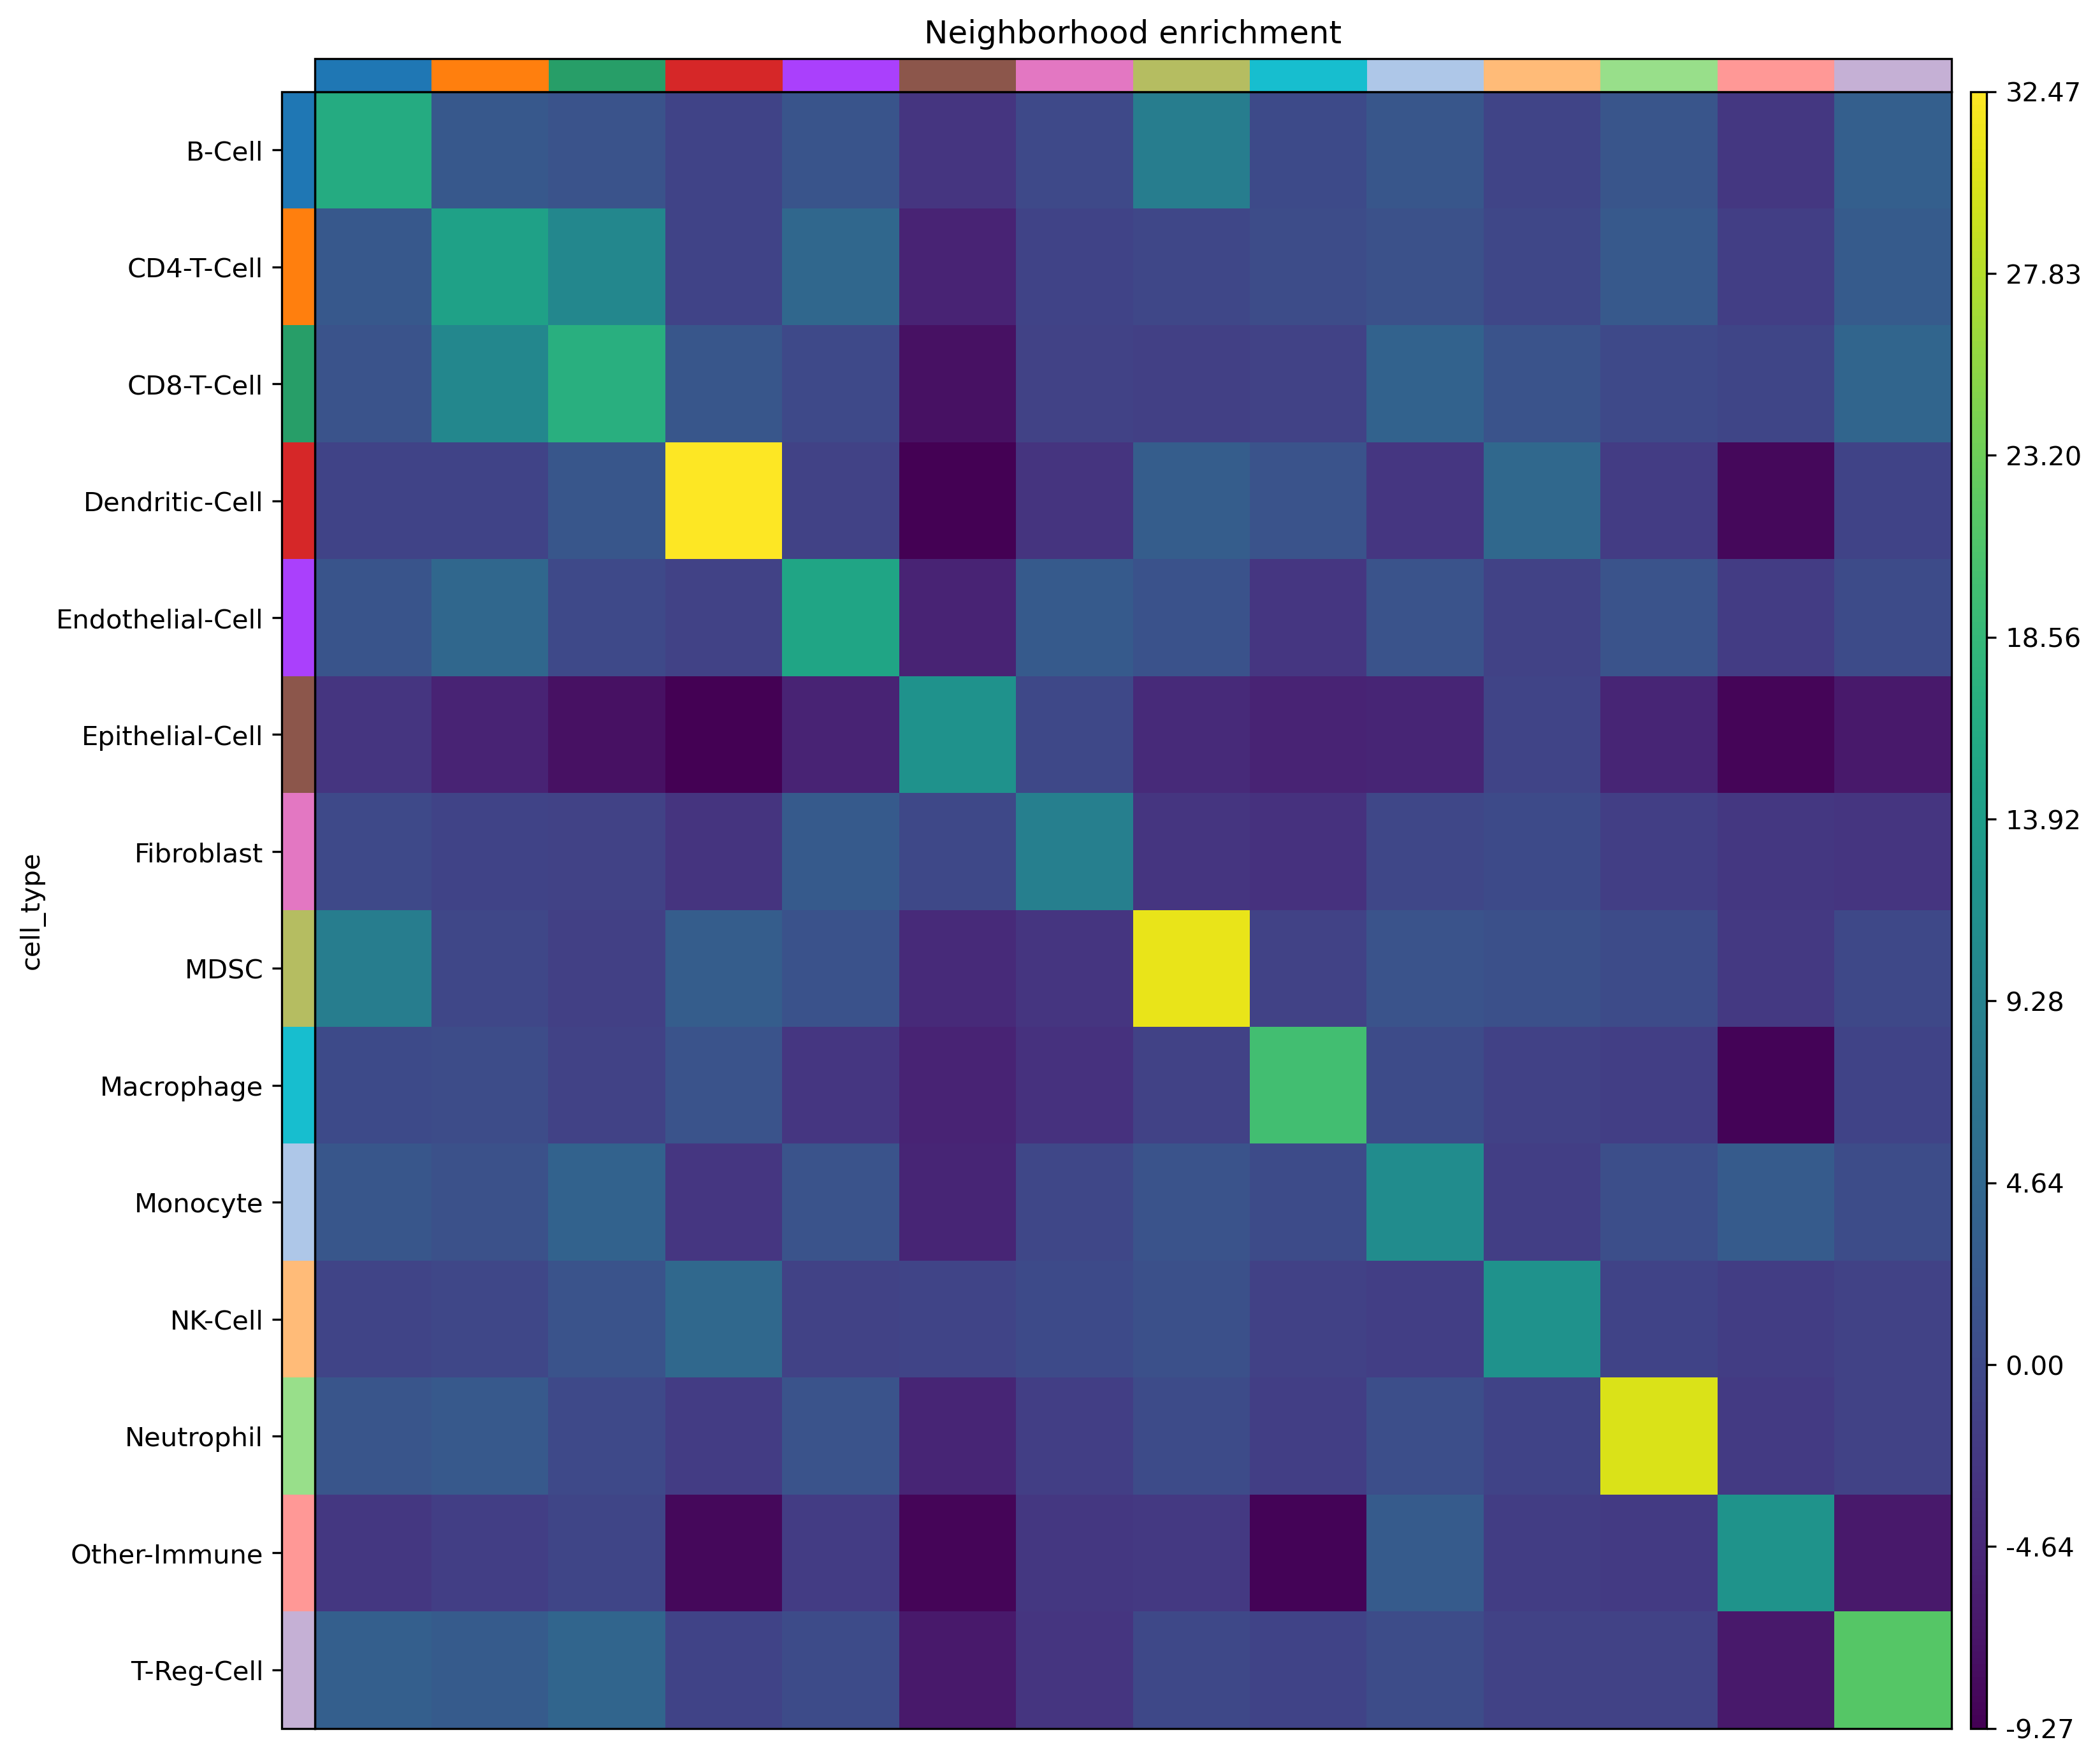

In [21]:
sq.pl.nhood_enrichment(roi_adata, cluster_key="cell_type", mode="zscore", dpi=300, save="./IndivisualROI-Enrichment-Zscore.png")
# plt.savefig("./IndivisualROI-Enrichment", transparent=False, dpi=300, bbox_inches="tight")  

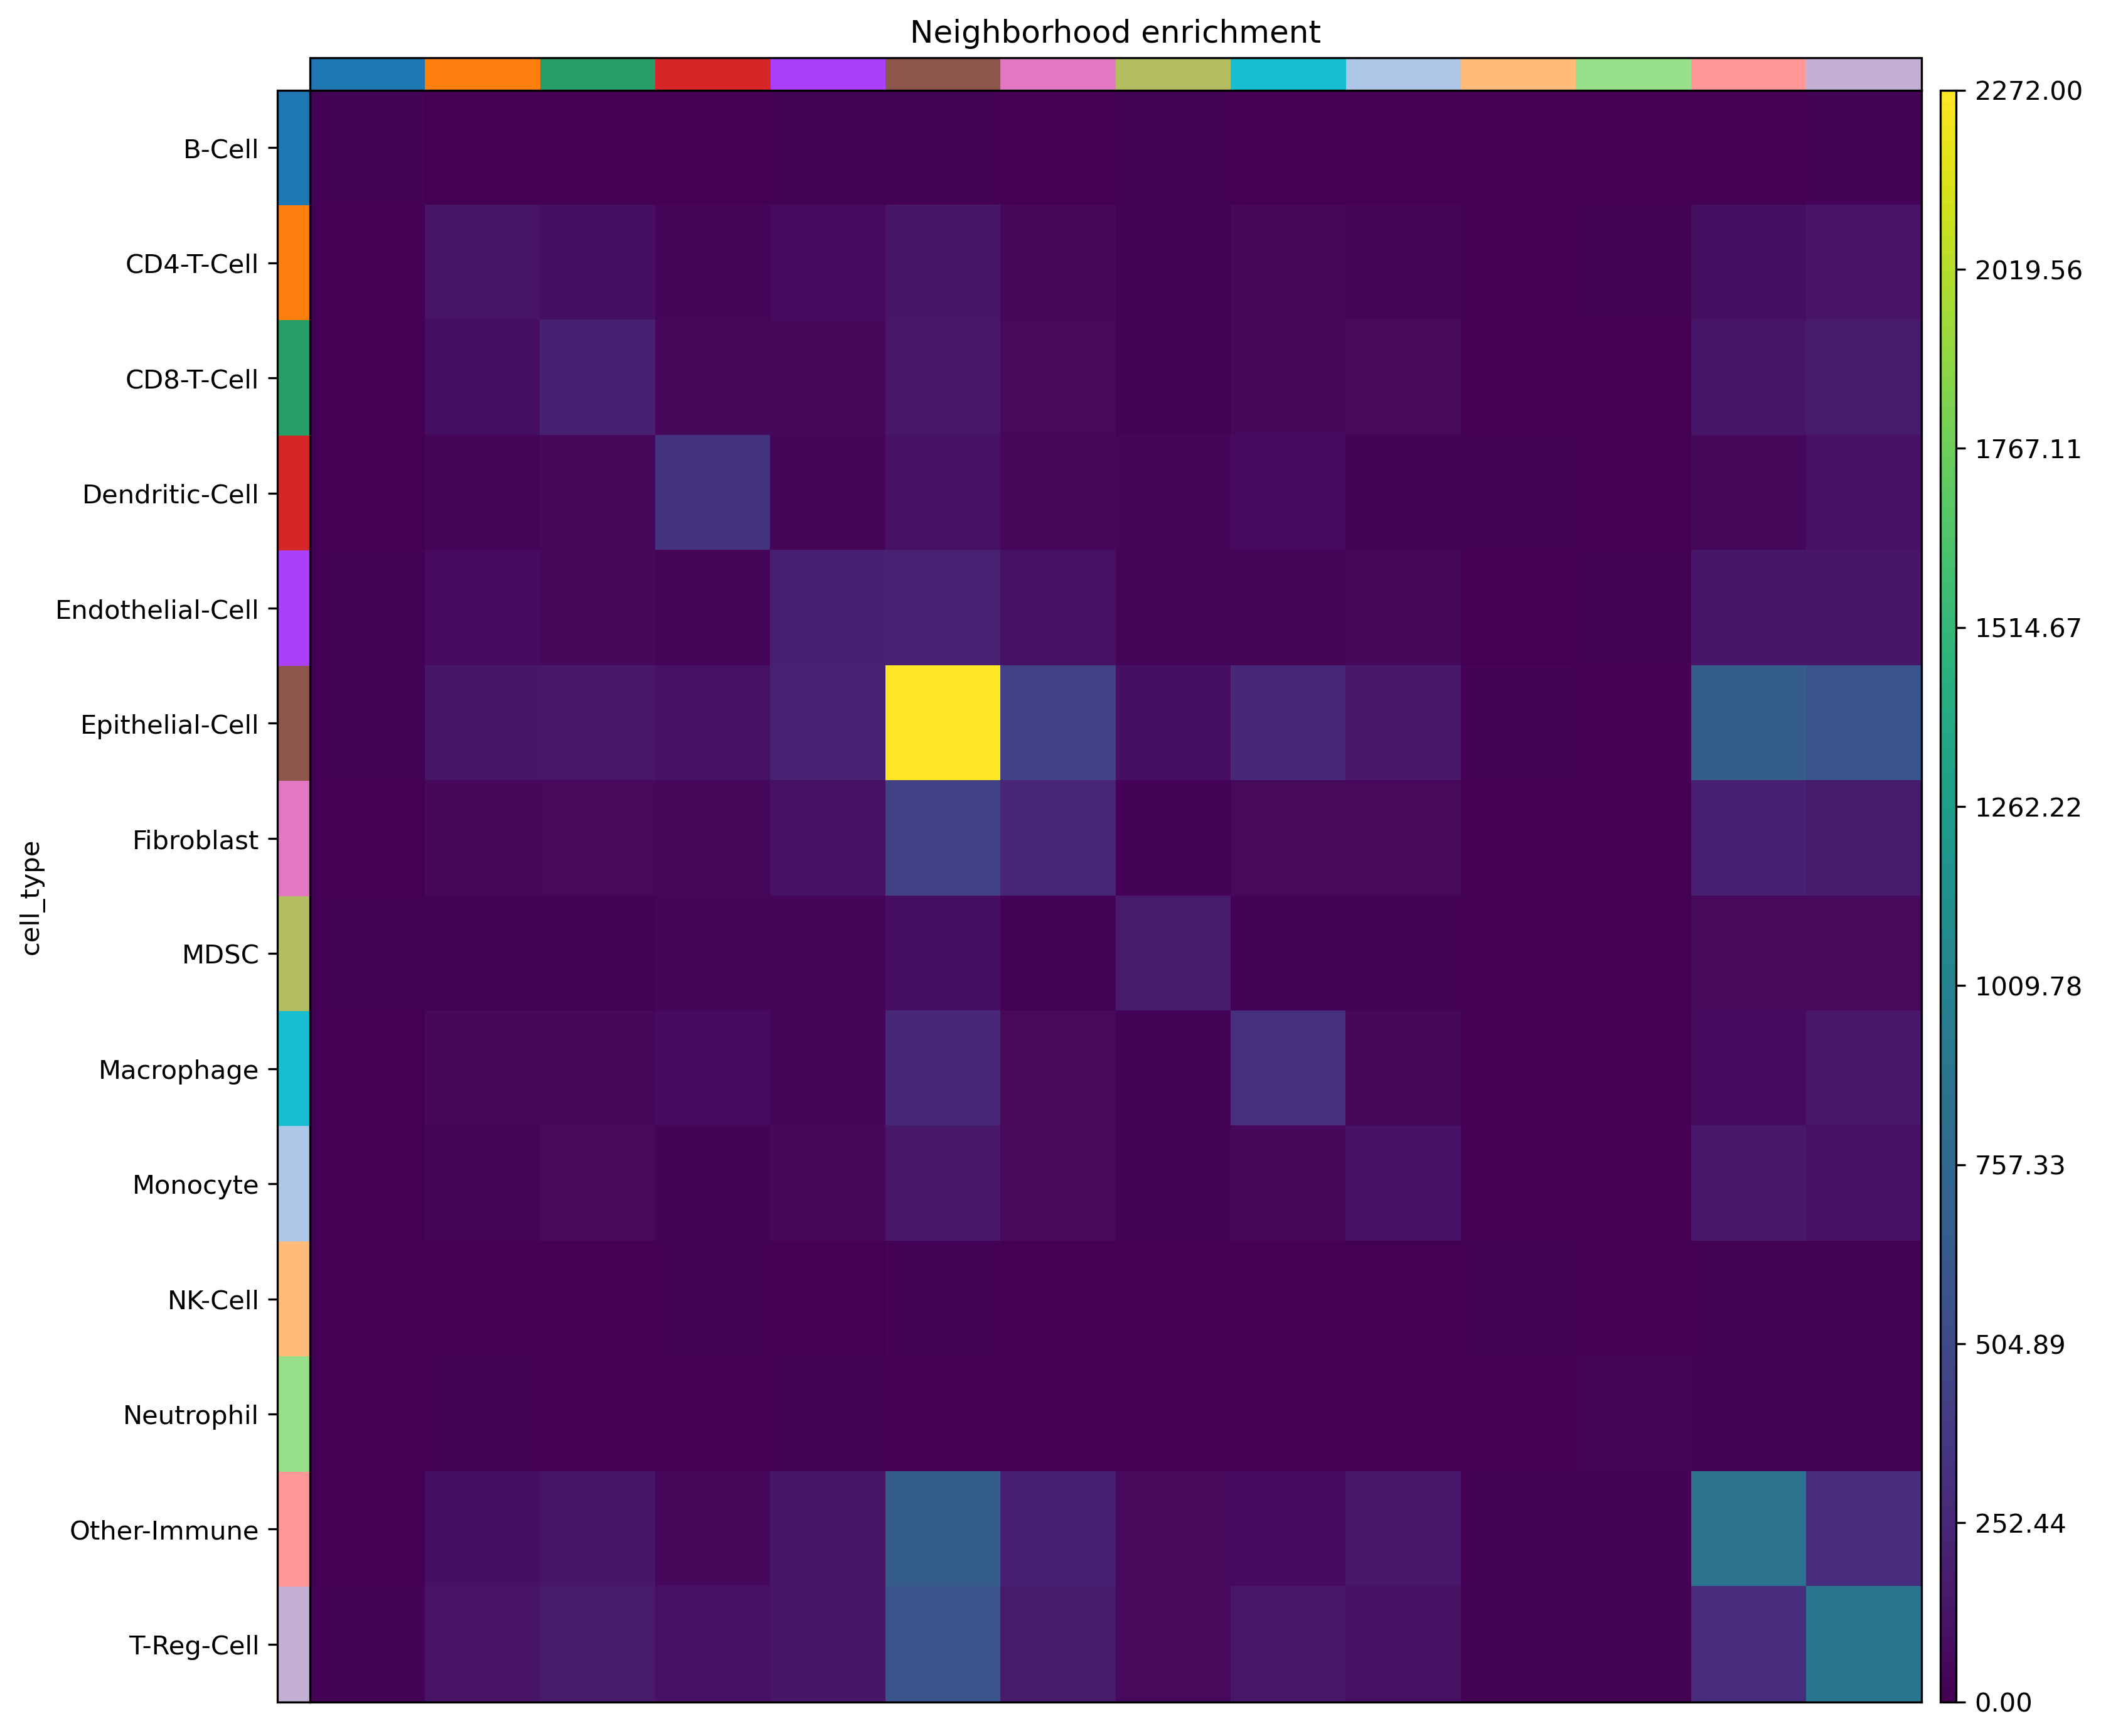

In [22]:
sq.pl.nhood_enrichment(roi_adata, cluster_key="cell_type", mode="count", dpi=300, save="./IndivisualROI-Enrichment-Count.png")
# plt.savefig("./IndivisualROI-Enrichment", transparent=False, dpi=300, bbox_inches="tight")  